In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
import matplotlib.pyplot as plt

### Customers Dataset

In [15]:
customers_df = pd.read_csv('Customers.csv')
customers_df.sample(10)

,CustomerID,CustomerName,Region,SignupDate
57,C0058,Zachary Turner,North America,2024-01-28
52,C0053,Albert Burke,Europe,2022-06-18
172,C0173,Francisco Young,Asia,2022-10-06
167,C0168,Karen Clements MD,South America,2022-12-13
141,C0142,Nicole Long DVM,Asia,2024-02-08
97,C0098,Laura Gilbert,North America,2024-10-21
3,C0004,Kathleen Rodriguez,South America,2022-10-09
92,C0093,Nancy Walker,Asia,2024-07-13
179,C0180,Amy Carpenter,Asia,2023-10-25
104,C0105,Ryan Hampton,Europe,2024-11-11


### Inspect the dataset

In [40]:
unique_customers = customers_df['CustomerID'].nunique()
print(f"Total Unique Customers: {unique_customers}")

Total Unique Customers: 200


In [17]:
print(customers_df.describe(include='all'))    #Summary

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3


In [19]:
print(customers_df.isnull().sum())    #Checking missing values present if any

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [29]:
print(customers_df.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object


### Customers by Region

In [34]:
region_distribution = customers_df['Region'].value_counts()
print(region_distribution)

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


### Account Signup

In [46]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])    #convertting to datetime

print("first Signup Date:", customers_df['SignupDate'].min())
print("last Signup Date:", customers_df['SignupDate'].max())

unique_signup_dates = customers_df['SignupDate'].nunique()
print(f"Total Unique Signup Dates: {unique_signup_dates}")

signup_trends = customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index()  #grouping by months
print(signup_trends)

first Signup Date: 2022-01-22 00:00:00
last Signup Date: 2024-12-28 00:00:00
Total Unique Signup Dates: 179
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


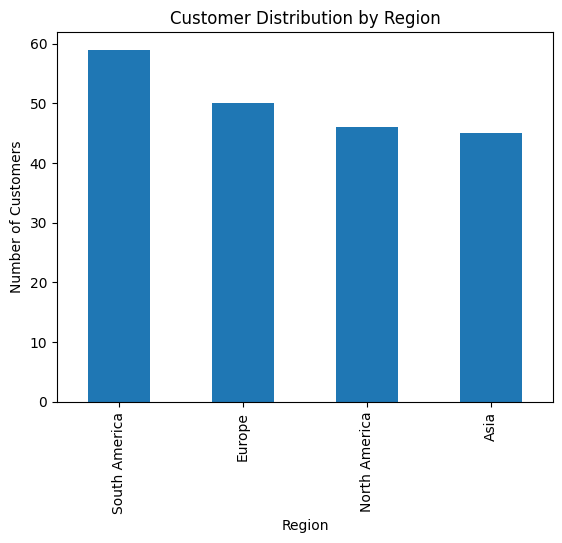

In [50]:
region_distribution.plot(kind='bar', title='Customer Distribution by Region', xlabel='Region', ylabel='Number of Customers') #Region wise customers
plt.show()

### Signup Activity by Day of the Week

SignupDay
Saturday     33
Sunday       33
Wednesday    29
Monday       28
Thursday     26
Tuesday      26
Friday       25
Name: count, dtype: int64


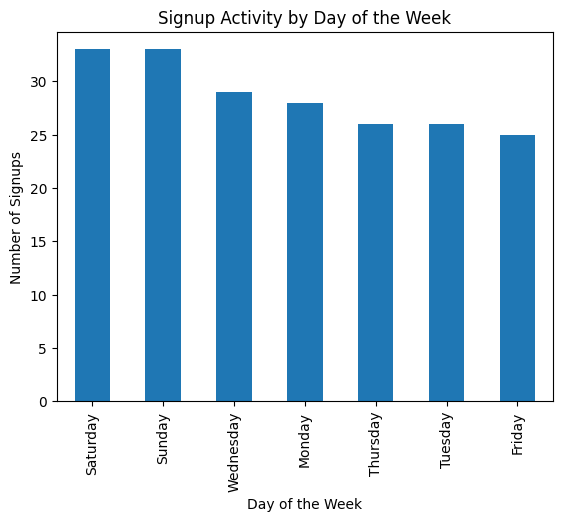

In [68]:
customers_df['SignupDay'] = customers_df['SignupDate'].dt.day_name()
signup_by_day = customers_df['SignupDay'].value_counts()
print(signup_by_day)

signup_by_day.plot(kind='bar', title='Signup Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Signups')
plt.show()

In [52]:
signup_by_region = customers_df.groupby('Region')['SignupDate'].count()  # Signup by regions
print(signup_by_region)

Region
Asia             45
Europe           50
North America    46
South America    59
Name: SignupDate, dtype: int64


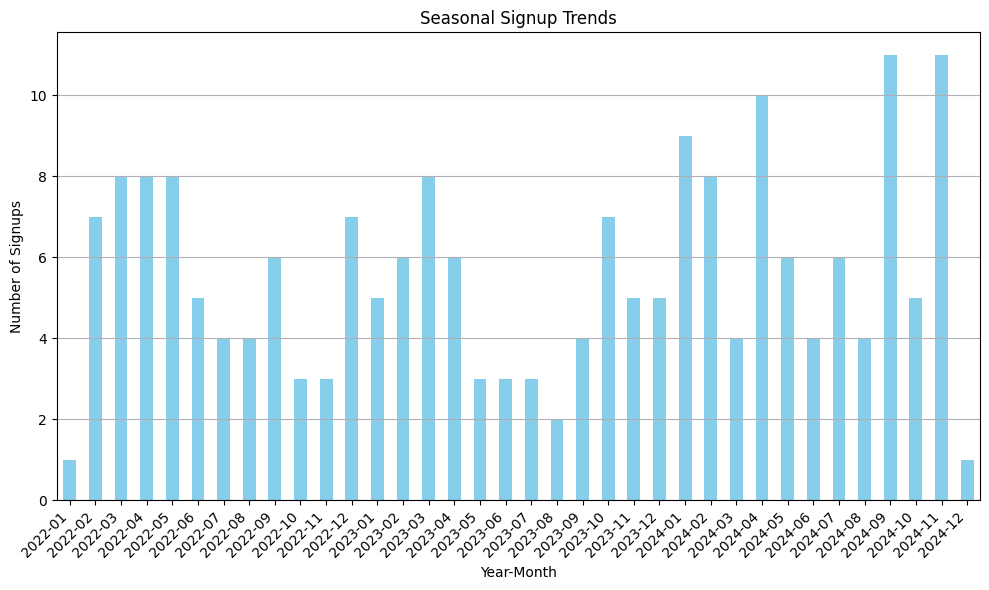

Months with the highest signup activity:
YearMonth
2024-09    11
2024-11    11
2024-04    10
Freq: M, dtype: int64


In [154]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

customers_df['YearMonth'] = customers_df['SignupDate'].dt.to_period('M')

signup_trends = customers_df.groupby('YearMonth').size()

plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='skyblue')
plt.title('Seasonal Signup Trends')
plt.xlabel('Year-Month')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

high_activity_months = signup_trends.sort_values(ascending=False).head(3)
print("Months with the highest signup activity:")
print(high_activity_months)

### Business Insights 1 : Regions like Asia/South America dominate customer numbers, while underrepresented regions offer growth potential. Spikes in signups during April, September, and November 2024 suggest effective campaigns. Signups across 179 days highlight impactful marketing in specific months. Zeotap can optimize regional efforts, replicate successes, and forecast trends to improve acquisition.

### Signup Growth Over Time

In [54]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df = customers_df.sort_values('SignupDate')
customers_df['CumulativeSignups'] = range(1, len(customers_df) + 1)

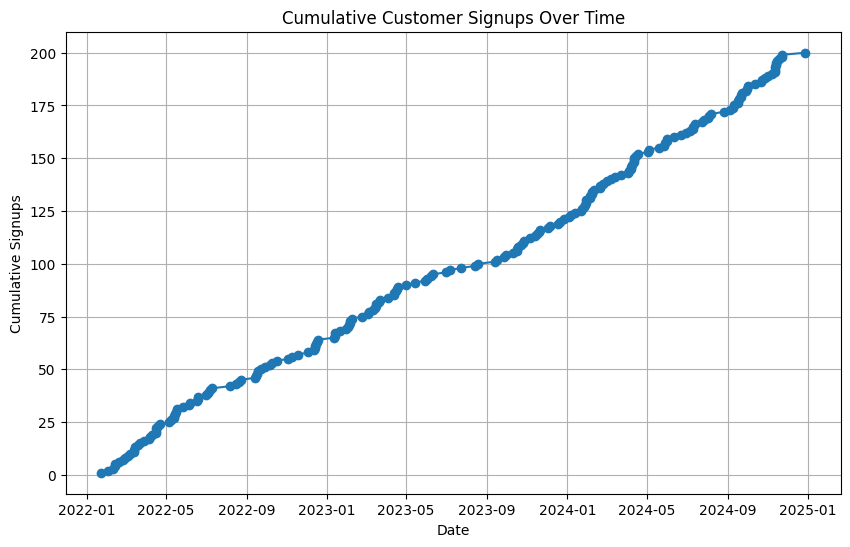

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(customers_df['SignupDate'], customers_df['CumulativeSignups'], marker='o')
plt.title('Cumulative Customer Signups Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Signups')
plt.grid()
plt.show()

### Region wise Signup Growth

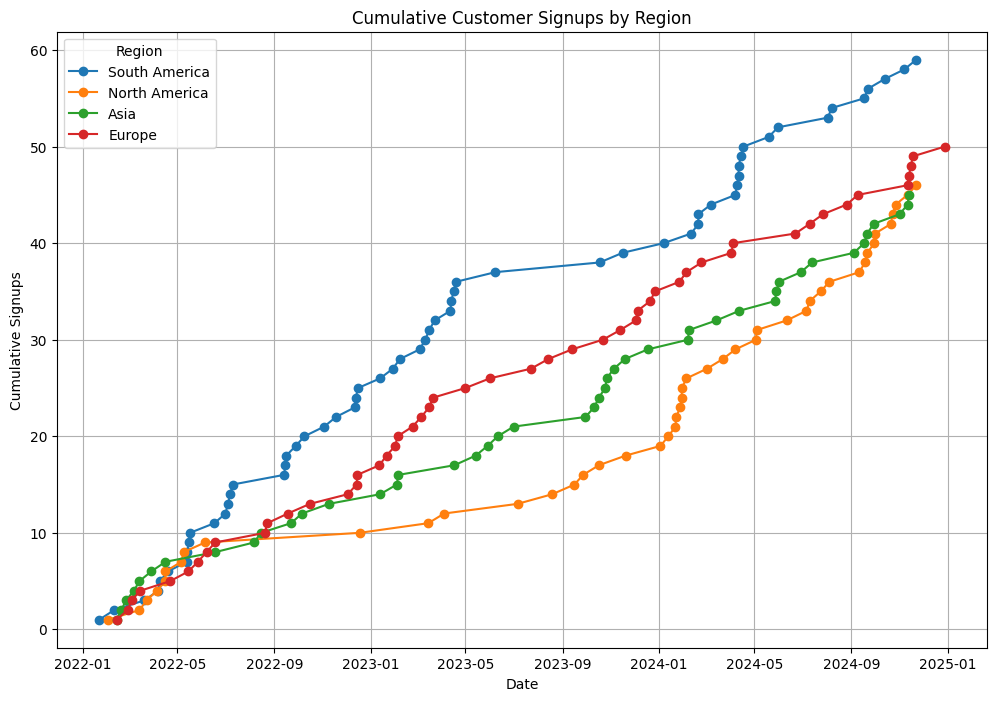

In [70]:
#customers_df = customers_df.sort_values('SignupDate')
customers_df['CumulativeSignups_reg'] = customers_df.groupby('Region').cumcount() + 1

plt.figure(figsize=(12, 8))

for region in customers_df['Region'].unique():
    region_data = customers_df[customers_df['Region'] == region]
    plt.plot(region_data['SignupDate'], region_data['CumulativeSignups_reg'], marker='o', label=region)

plt.title('Cumulative Customer Signups by Region')
plt.xlabel('Date')
plt.ylabel('Cumulative Signups')
plt.legend(title='Region')
plt.grid()
plt.show()

### Business Insights 2 : Steady customer growth indicates effective acquisition strategies, though plateaus highlight optimization opportunities. Regions with faster growth show success, while slower ones reveal untapped potential. Zeotap can analyze slow-growth periods, replicate high-growth strategies, target underperforming regions, and enhance retention in rapidly growing areas to sustain and expand momentum.

### Products Dataset

In [21]:
products_df = pd.read_csv('Products.csv')
products_df.sample(10)

,ProductID,ProductName,Category,Price
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
82,P083,ActiveWear Smartwatch,Electronics,455.72
37,P038,TechPro Vase,Home Decor,147.22
50,P051,ComfortLiving Desk Lamp,Home Decor,65.16
60,P061,HomeSense Desk Lamp,Home Decor,156.96
25,P026,SoundWave Bluetooth Speaker,Electronics,64.38
64,P065,BookWorld Sweater,Clothing,427.61
93,P094,HomeSense Cookware Set,Home Decor,447.34
49,P050,ActiveWear Smartwatch,Electronics,437.65
23,P024,SoundWave Cookbook,Books,338.66


### Inspect the dataset

In [25]:
print(customers_df.describe(include='all'))    #Summary

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3


In [27]:
print(customers_df.isnull().sum())    #Checking missing values present if any

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [83]:
unique_products = products_df['ProductID'].nunique()
print(f"Total Unique Products: {unique_products}")

unique_categories = products_df['Category'].nunique()
print(f"Total Unique Categories: {unique_categories}")

category_distribution = products_df['Category'].value_counts()
print(category_distribution)

Total Unique Products: 100
Total Unique Categories: 4
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [85]:
price_stats = products_df['Price'].describe()
print(price_stats)

count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [89]:
most_expensive_product = products_df.loc[products_df['Price'].idxmax()]      #most expensive
cheapest_product = products_df.loc[products_df['Price'].idxmin()]        #least expensive
print("Most Expensive Product:", most_expensive_product)
print("Cheapest Product:", cheapest_product)

Most Expensive Product: ProductID                  P075
ProductName    TechPro Textbook
Category                  Books
Price                    497.76
Name: 74, dtype: object
Cheapest Product: ProductID                      P056
ProductName    SoundWave Smartwatch
Category                Electronics
Price                         16.08
Name: 55, dtype: object


### Category wise Price Distribution 

             count        mean         std    min       25%     50%       75%  \
Category                                                                        
Books         26.0  292.212308  153.800135  33.59  154.2975  337.94  419.2125   
Clothing      25.0  263.720000  157.965038  18.82  126.3400  303.50  389.2000   
Electronics   26.0  275.353462  137.056612  16.08  168.8000  282.72  394.3650   
Home Decor    23.0  235.020000  122.236552  41.18  142.3800  235.58  314.9750   

                max  
Category             
Books        497.76  
Clothing     481.78  
Electronics  459.86  
Home Decor   454.53  


<Figure size 1200x600 with 0 Axes>

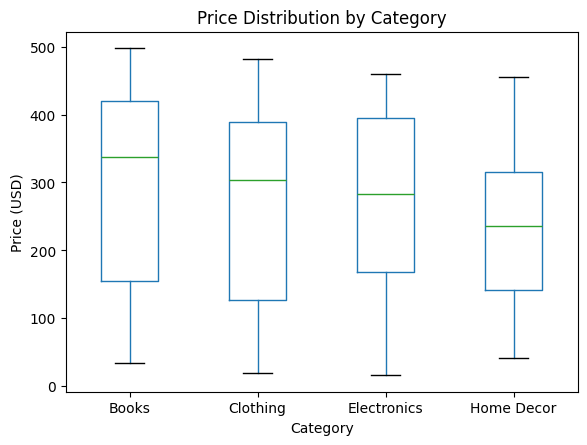

In [92]:
price_by_category = products_df.groupby('Category')['Price'].describe()
print(price_by_category)

plt.figure(figsize=(12, 6))
products_df.boxplot(column='Price', by='Category', grid=False)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.suptitle('')  # Suppress default title
plt.show()

### Business Insights 3 : The price distribution across categories reveals strategic opportunities. Books have the widest price range and highest variability, suggesting a mix of budget and premium options appealing to diverse customer segments. Electronics, with higher median prices, indicate a strong market for premium products. Home Decor and Clothing exhibit smaller price ranges and lower median prices, reflecting more consistent pricing strategies, which could target price-sensitive customers. Outliers in Electronics and Home Decor categories represent potential luxury or high-value items. Zeotap can leverage this analysis to optimize pricing strategies, focusing on premium products while exploring competitive pricing for consistent categories.

### Transactions Dataset

In [99]:
transactions_df = pd.read_csv('Transactions.csv')
transactions_df.sample(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
711,T00119,C0147,P018,2024-03-13 02:57:13,1,436.89,436.89
279,T00897,C0195,P047,2024-04-30 14:23:08,3,477.99,159.33
646,T00428,C0071,P001,2024-08-02 08:13:23,2,338.60,169.30
741,T00931,C0114,P043,2024-09-04 22:08:05,4,1617.60,404.40
909,T00966,C0154,P094,2024-03-04 05:11:01,2,894.68,447.34
433,T00300,C0160,P022,2024-08-16 08:44:30,4,550.16,137.54
417,T00555,C0088,P039,2024-12-15 04:43:29,1,430.59,430.59
838,T00159,C0163,P002,2024-10-12 03:12:30,4,1385.20,346.30
888,T00185,C0108,P028,2024-03-07 03:54:06,4,942.32,235.58
728,T00831,C0184,P083,2024-05-19 18:25:44,2,911.44,455.72


### Inspect the dataset

In [101]:
print(transactions_df.info())
print(transactions_df.describe(include='all'))
print(transactions_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00992      C0109      P059  2024-04-21 10:52:24          NaN   
freq               1         11        19                    1          NaN   
mean             N

In [103]:
unique_customers = transactions_df['CustomerID'].nunique()     #Unique customers
unique_products = transactions_df['ProductID'].nunique()        # Unique products
print(f"Unique Customers: {unique_customers}")
print(f"Unique Products: {unique_products}")

Unique Customers: 199
Unique Products: 100


### Sales Trends Over Time

In [106]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['MonthYear'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('MonthYear')['TotalValue'].sum()
print(monthly_sales)

MonthYear
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


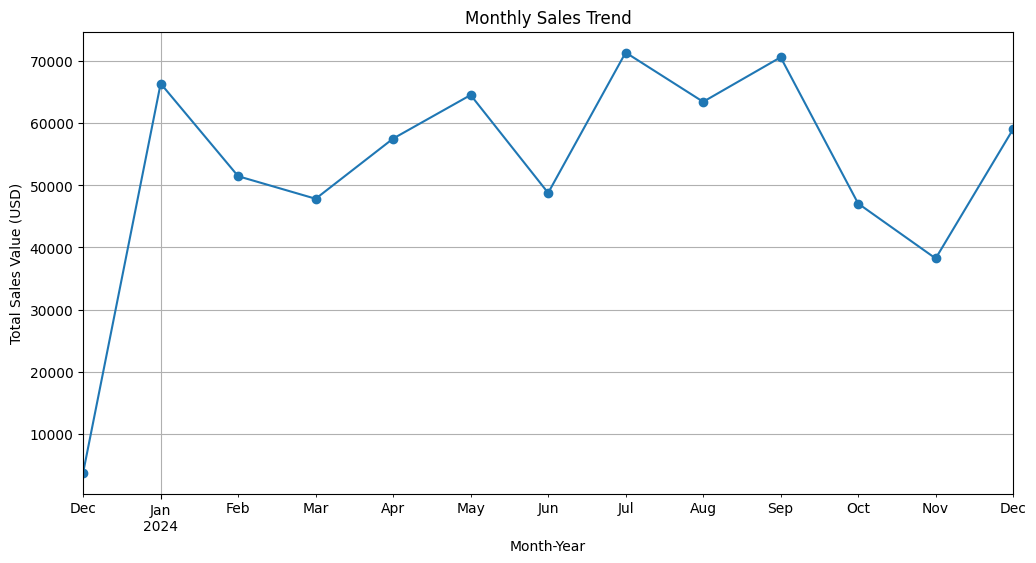

In [108]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Value (USD)')
plt.grid()
plt.show()

### Business Insights 4 : Monthly sales data indicates a significant spike in January 2024, with revenue peaking at $66,376.39, likely driven by post-holiday promotions or New Year campaigns. Other high-performing months include July and September 2024, suggesting potential seasonal demand or successful marketing efforts. Conversely, months like November and October 2024 show lower sales, signaling a need for improved strategies. Zeotap can leverage this trend analysis to optimize future campaigns, focus on high-revenue months, and address slower periods effectively.

### Average Spend Per Customer

In [129]:
customer_spend = transactions_df.groupby('CustomerID')['TotalValue'].sum()
avg_spend = customer_spend.mean()
print(f"Average Spend Per Customer: {avg_spend}")

Average Spend Per Customer: 3467.314371859297


### Customer Retention

In [141]:
customer_transactions = transactions_df['CustomerID'].value_counts()
repeat_customers = customer_transactions[customer_transactions > 1]
print(f"Repeat Customers: {len(repeat_customers)}")
print(f"Percentage of Repeat Customers: {len(repeat_customers) / len(customer_transactions) * 100:.2f}%")

Repeat Customers: 187
Percentage of Repeat Customers: 93.97%


### Most Profitable Customers

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


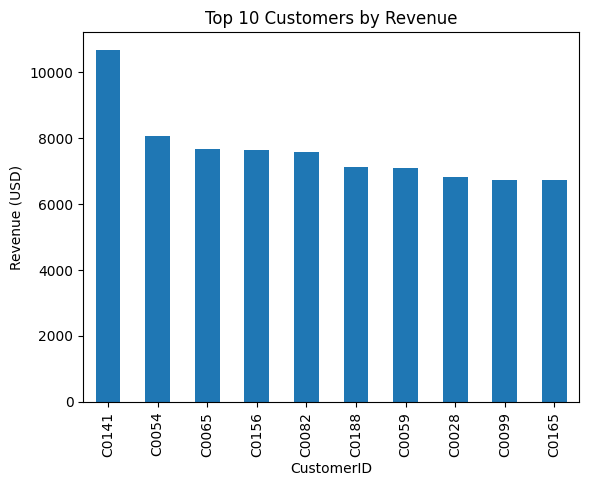

In [132]:
customer_revenue = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
print(customer_revenue.head(10))

customer_revenue.head(10).plot(kind='bar', title='Top 10 Customers by Revenue', xlabel='CustomerID', ylabel='Revenue (USD)')
plt.show()

### Business Insights 5 : Customer Spending Behavior: The average customer spend is 3,467.31, with the top 10 customers contributing significantly higher revenue, such as C0141 ($10,673.87). This indicates a small group of high-value customers driving substantial revenue. Customer Retention: 93.97% of customers are repeat buyers, showcasing strong customer retention. However, opportunities exist to further engage and upsell to repeat customers for enhanced revenue.Focus on high-value customers with personalized offers or loyalty programs. Target lower spenders with cross-selling or tailored promotions.

### Revenue Contribution by Region

In [111]:
transactions_with_region = transactions_df.merge(customers_df, on='CustomerID')  # Merging Transactions dataset with customers dataset

In [113]:
region_revenue = transactions_with_region.groupby('Region')['TotalValue'].sum()
print(region_revenue)


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


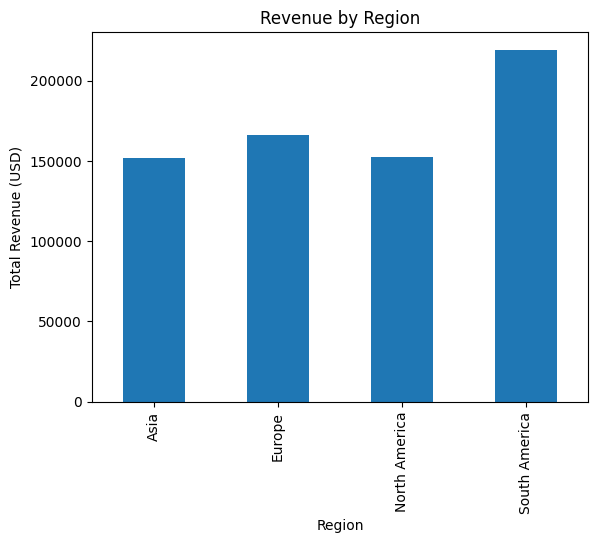

In [115]:
region_revenue.plot(kind='bar', title='Revenue by Region', ylabel='Total Revenue (USD)', xlabel='Region')
plt.show()

### Revenue by Category

In [147]:
transactions_with_products = transactions_df.merge(products_df, on='ProductID')   # Merging Transaction dataset with products dataset

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


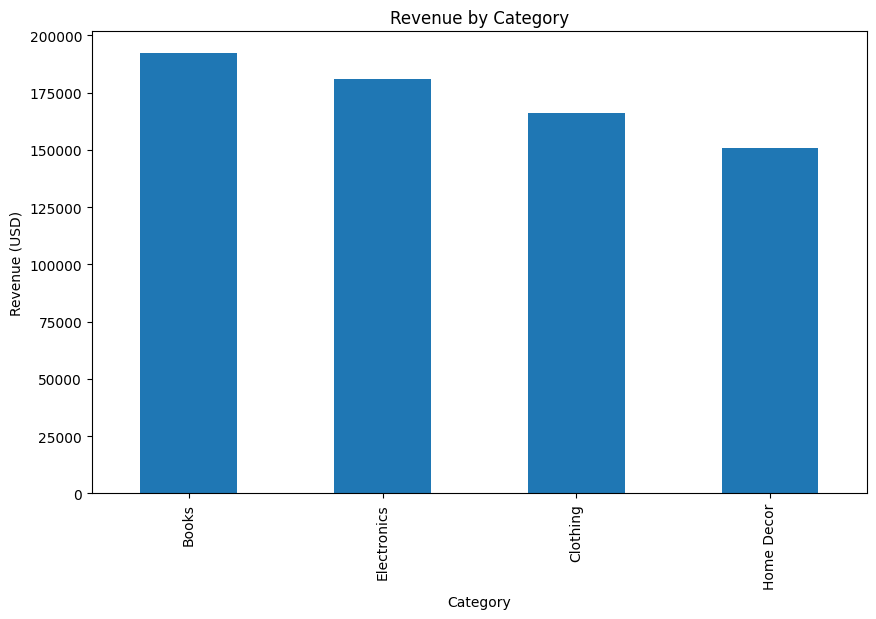

In [123]:
category_revenue = transactions_with_products.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(category_revenue)

# Plot revenue by category
category_revenue.plot(kind='bar', title='Revenue by Category', xlabel='Category', ylabel='Revenue (USD)', figsize=(10, 6))
plt.show()

### Product Popularity Based on Quantity

In [149]:
bulk_purchases = transactions_with_products.groupby(['ProductID', 'Category'])['Quantity'].sum().sort_values(ascending=False)
print(bulk_purchases.head(10))

ProductID  Category   
P054       Books          46
P059       Clothing       46
P029       Electronics    45
P048       Books          43
P057       Electronics    43
P061       Home Decor     43
P079       Home Decor     43
P062       Books          39
P020       Clothing       38
P028       Home Decor     38
Name: Quantity, dtype: int64


### Business Insights 6 : 1. Regional Revenue Distribution: South America leads with 219,352.56, followed by Europe and North America, highlighting strong regional performance. Asia, with relatively lower revenue, presents growth opportunities for targeted campaigns and market penetration.         2. Category Revenue Trends: Books generate the highest revenue ($192,147.47), followed by Electronics and Clothing, indicating strong customer demand. Home Decor shows potential for growth with strategic promotions or bundled offerings.                                                                  3. Bulk Purchases: Products like P054 (Books) and P059 (Clothing) dominate bulk orders, suggesting high demand. Zeotap can leverage this data to optimize inventory and offer volume-based discounts for popular products.

### Top Products by Revenue

ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


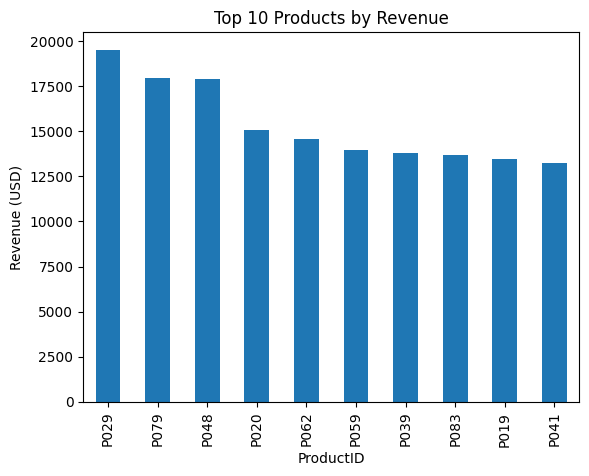

In [118]:
product_revenue = transactions_df.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
print(product_revenue.head(10))

product_revenue.head(10).plot(kind='bar', title='Top 10 Products by Revenue', xlabel='ProductID', ylabel='Revenue (USD)')
plt.show()

### Regional Trends in Product Categories

In [135]:
merged_data = transactions_df.merge(products_df, on='ProductID').merge(customers_df, on='CustomerID')      # Merging all 3 datasets

Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


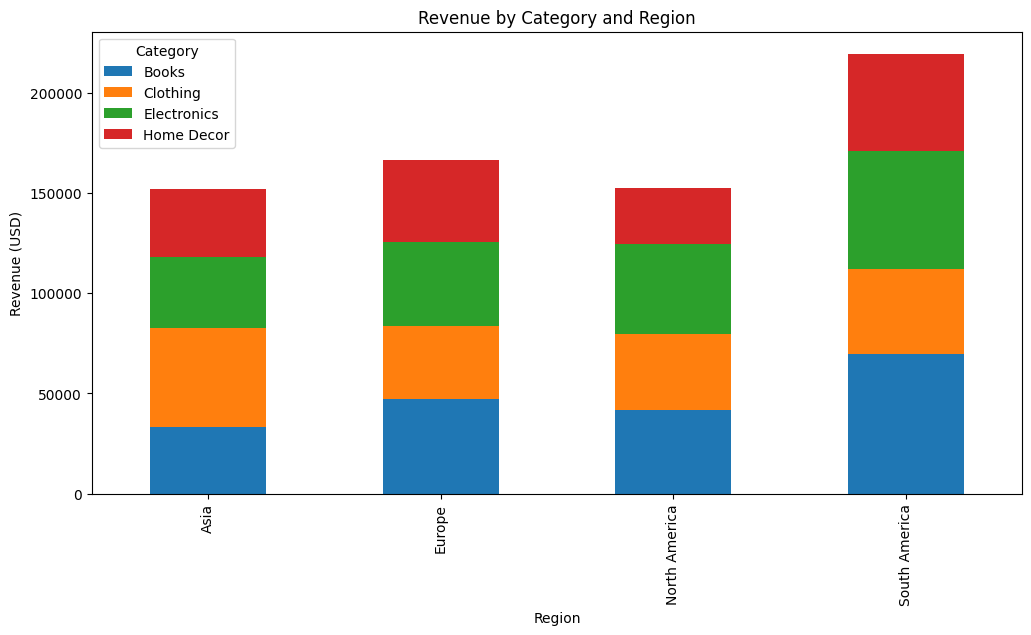

In [137]:
category_region_revenue = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
print(category_region_revenue)

category_region_revenue.plot(kind='bar', stacked=True, figsize=(12, 6), title='Revenue by Category and Region')
plt.ylabel('Revenue (USD)')
plt.xlabel('Region')
plt.show()

### Business Insights 7 : The top 10 products, led by P029 (19,513.80) and P079 (17,946.91), contribute significantly to revenue, indicating strong customer preferences. South America dominates category revenue, excelling in Books (69,752) and Electronics (58,846). Asia leads in Clothing, reflecting regional demand variations. Zeotap can optimize inventory for high-performing products, focus on regional category strengths, and target weaker areas like Home Decor in North America to drive balanced growth.

In [139]:
top_products_by_category = merged_data.groupby(['Category', 'ProductID'])['TotalValue'].sum().reset_index()
top_products = top_products_by_category.loc[top_products_by_category.groupby('Category')['TotalValue'].idxmax()]
print(top_products)

       Category ProductID  TotalValue
10        Books      P048    17905.20
30     Clothing      P020    15060.92
59  Electronics      P029    19513.80
93   Home Decor      P079    17946.91
